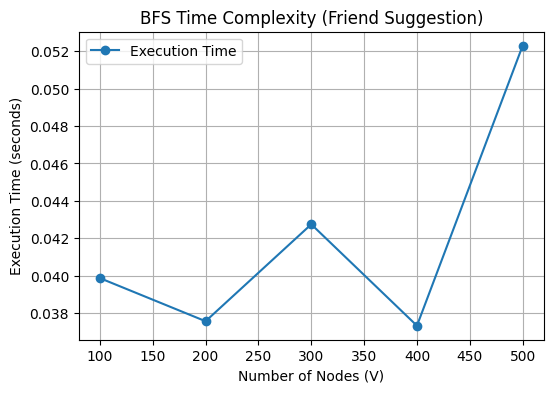

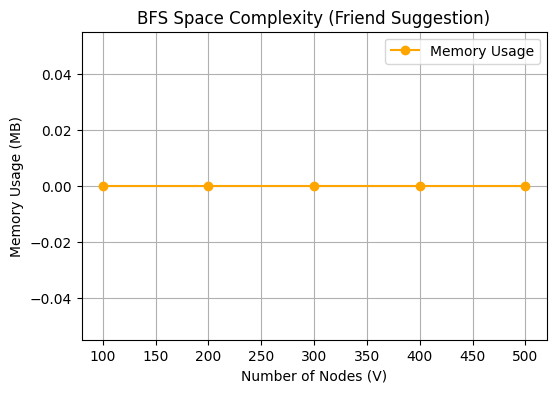

✅ Expected Time Complexity: O(V + E)
✅ Expected Space Complexity: O(V)


In [10]:
# === Problem 1: Social Network Friend Suggestion (BFS) ===
!pip install memory_profiler psutil matplotlib --quiet

import time
import random
from memory_profiler import memory_usage
import matplotlib.pyplot as plt
from collections import deque, defaultdict

# --- BFS-based Friend Suggestion ---
def bfs_friend_suggestion(graph, user):
    visited = set([user])
    queue = deque([user])
    level = 0
    friends_of_friends = set()

    while queue and level < 2:
        for _ in range(len(queue)):
            node = queue.popleft()
            for nei in graph[node]:
                if nei not in visited:
                    visited.add(nei)
                    queue.append(nei)
                    if level == 0:  # collect friends-of-friends
                        friends_of_friends.update(graph[nei])
        level += 1

    # remove direct friends & the user
    return list(friends_of_friends - set(graph[user]) - {user})

# --- Generate Random Social Graph ---
def generate_social_graph(n):
    graph = defaultdict(list)
    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < 0.1:  # 10% chance of connection
                graph[i].append(j)
                graph[j].append(i)
    return graph

# --- Performance Profiling ---
sizes, times, mems = [], [], []

for n in range(100, 600, 100):
    graph = generate_social_graph(n)
    start = time.time()
    mem_usage = memory_usage((bfs_friend_suggestion, (graph, 0)), interval=0.1)
    end = time.time()
    times.append(end - start)
    mems.append(max(mem_usage) - min(mem_usage))
    sizes.append(n)

# --- Plot Time Complexity ---
plt.figure(figsize=(6,4))
plt.plot(sizes, times, marker='o', label='Execution Time')
plt.title("BFS Time Complexity (Friend Suggestion)")
plt.xlabel("Number of Nodes (V)")
plt.ylabel("Execution Time (seconds)")
plt.grid(True)
plt.legend()
plt.show()

# --- Plot Space Complexity ---
plt.figure(figsize=(6,4))
plt.plot(sizes, mems, marker='o', color='orange', label='Memory Usage')
plt.title("BFS Space Complexity (Friend Suggestion)")
plt.xlabel("Number of Nodes (V)")
plt.ylabel("Memory Usage (MB)")
plt.grid(True)
plt.legend()
plt.show()

print("✅ Expected Time Complexity: O(V + E)")
print("✅ Expected Space Complexity: O(V)")
